<a href="https://colab.research.google.com/github/asarria48/Nuclear-physics/blob/main/Simulaci%C3%B3n3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import poisson, norm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

#Prueba
demostración de que el uso de N veces poisson.rvs(mu,size=1) produce una muestra descrita por poisson.pmf(x,mu).

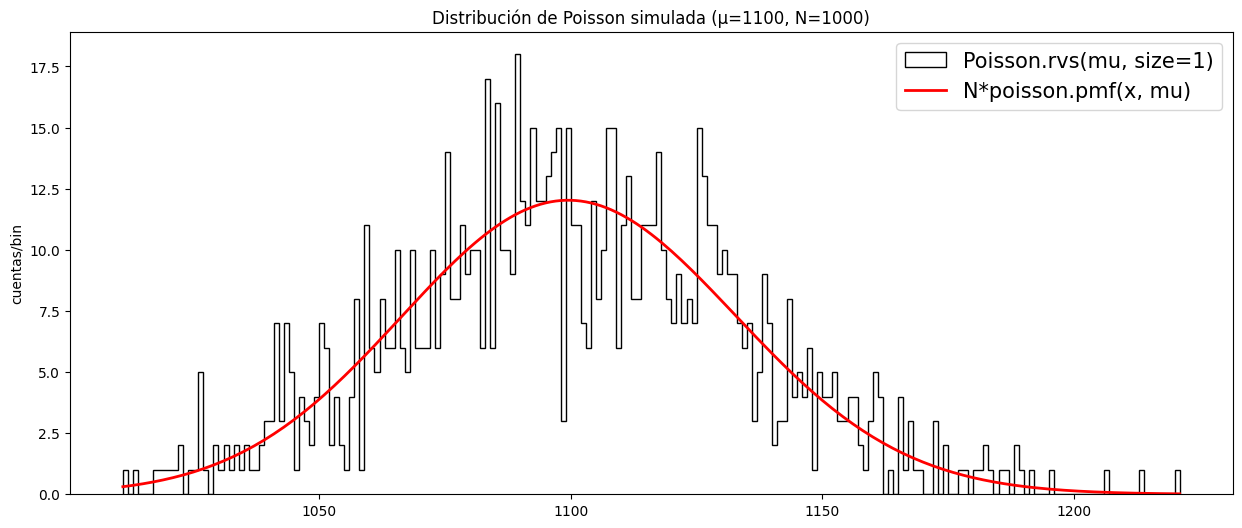

In [2]:
mu = 1100       # parámetro de la distribución de Poisson (media)
N = 1000        # número de veces que se simulo un evento aleatorio


data = [poisson.rvs(mu, size=1) for i in range(N)]        # simulo N variables aleatorias de la distribución de Poisson, esto deja una lista de N arrays
data = np.concatenate(data)                               # para que quede solo un array de N números "Poisson"
min = np.min(data)                                        # límite inferior
max = np.max(data)                                        # límite superior

x = np.arange(min, max + 1)                               # array de enteros desde el mín hasta el máx

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

ax.hist(data, bins=x, alpha=1, label="Poisson.rvs(mu, size=1)", color="black", histtype="step")    # dibujo el histograma (defino los bordes de las barras del histograma con l, Poisson da números enteros)


pmf = poisson.pmf(x, mu) * N                                                           # calculo la función de masa (discreta) de probabilidad, multiplico por N para escalar al número de cuentas
ax.plot(x, pmf, "red", lw=2, label="N*poisson.pmf(x, mu)")                          # plot de Poisson


'''descomentar el pedazo siguiente si quisiera comparar con una distribución gaussiana'''

#gaussian = norm.pdf(x, mu, np.sqrt(mu)) * N                                           # calculo la función de densidad (gaussiana) escalo al número de cuentas
#ax.plot(x, gaussian, "darkorange", lw=2, label="Gaussiana", linestyle="--")           # plot de gaussiana


ax.set_ylabel("cuentas/bin")
ax.set_title(f"Distribución de Poisson simulada (μ={mu}, N={N})")
ax.legend(fontsize=15)

plt.show()


# T1
escribir el programa que realice la estrategia de decaimientos simulada

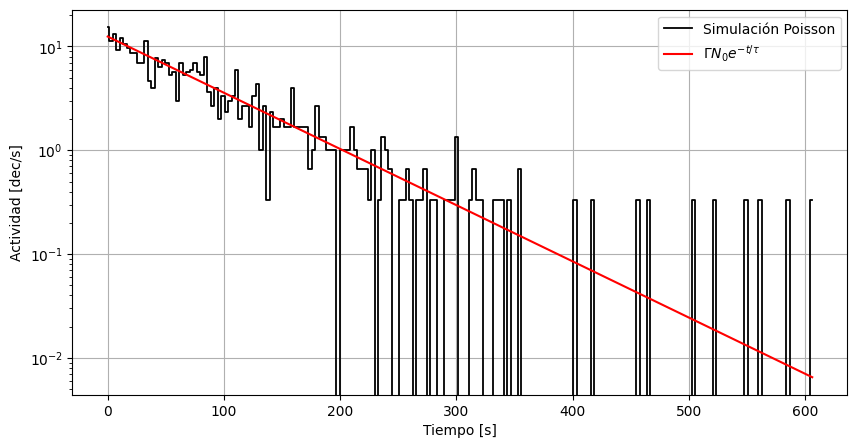

In [5]:
N0 = 1000                             # número de núcleos iniciales
T_med = 55.6                          # semi-vida del 220 Radón (Rn), en segundos (https://www.nndc.bnl.gov/nudat3/)
tau = T_med/math.log(2)               # vida media del 220Rn en segundos
dt = 3                                #se escoge un número suficientemente pequeño comparado con T_med, pero no tanto como para no percibir los decaimientos.
                                      #para definir la probabilidad de decaimiento recordamos la ley de decaimiento N(t)=N0e^{-t/tau}, para un intervalo de tiempo
                                      #pequeño dt tenemos que la fracción de núcleos que decaen es p=1-e^{-dt/tau} que podemos aproximar como p=dt/tau
p_approx = dt/tau                     # aproximación bajo el supuesto de que \Delta t << \tau
p_exacta = 1-np.exp(-dt/tau)
t = 0                                 # en el tiempo  inicial
N = N0                                # el total de núcleos son los iniciales


tiempos = [t]                         # inicializo la lista de tiempos con el inicial
N_t = [N]                             # número de núcleos en el instante t_i
A_t = []                              # inicializo para la actividad en cada instante t_i

while N > 0:                          # siempre que aún hayan núcleos sin decaer
  mu = N*p_approx                     # media de Poisson (número de núcleos promedio que decaen en \Delta t)
  X = poisson.rvs(mu, size=1)[0]      # genera un número aleatorio (entero) segun la distribución con media \mu, size=1 pide un solo valor y [0] lo saca del array
  A = X/dt                            # actividad en el intervalo (t_i, t_i+\Delta t), número X de núcleos desintegrados durante el intervalo \Delta t
  N -= X                              # actualizo el número de núcleos que aún no se desintegran
  t += dt                             # actualizo el tiempo, sumo segundos
  tiempos.append(t)                   # guardo el nuevo tiempo
  N_t.append(N)                       # guardo los núcleos restantes
  A_t.append(A)                       # guardo la actividad simulada en el tiempo transcurrido

# para construir las curvas teóricas
t_teo = np.array(tiempos)             # convierto tiempos en array
N_teo = N0*np.exp(-t_teo/tau)         # uso la forma analítica del decaimiento exponencial
A_teo = (N0/tau)*np.exp(-t_teo/tau)   # uso la forma analítica de la actividad

plt.figure(figsize=(10,5))
plt.semilogy(tiempos[:-1], A_t, color='black', drawstyle='steps-mid', linewidth=1.3, label='Simulación Poisson')
plt.semilogy(t_teo[:-1], A_teo[:-1], 'r-', label=r'$\Gamma N_0 e^{-t/\tau}$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Actividad [dec/s]')
#plt.title('Decaimiento nuclear simulado')
plt.legend()
plt.grid()
plt.show()


#T4
Para N(0) = 100: Para el tiempo inicial y para un tiempo intermedio grafique:
1. La probabilidad de que un número x de núcleos decaigan.
2. La función acumulativa.


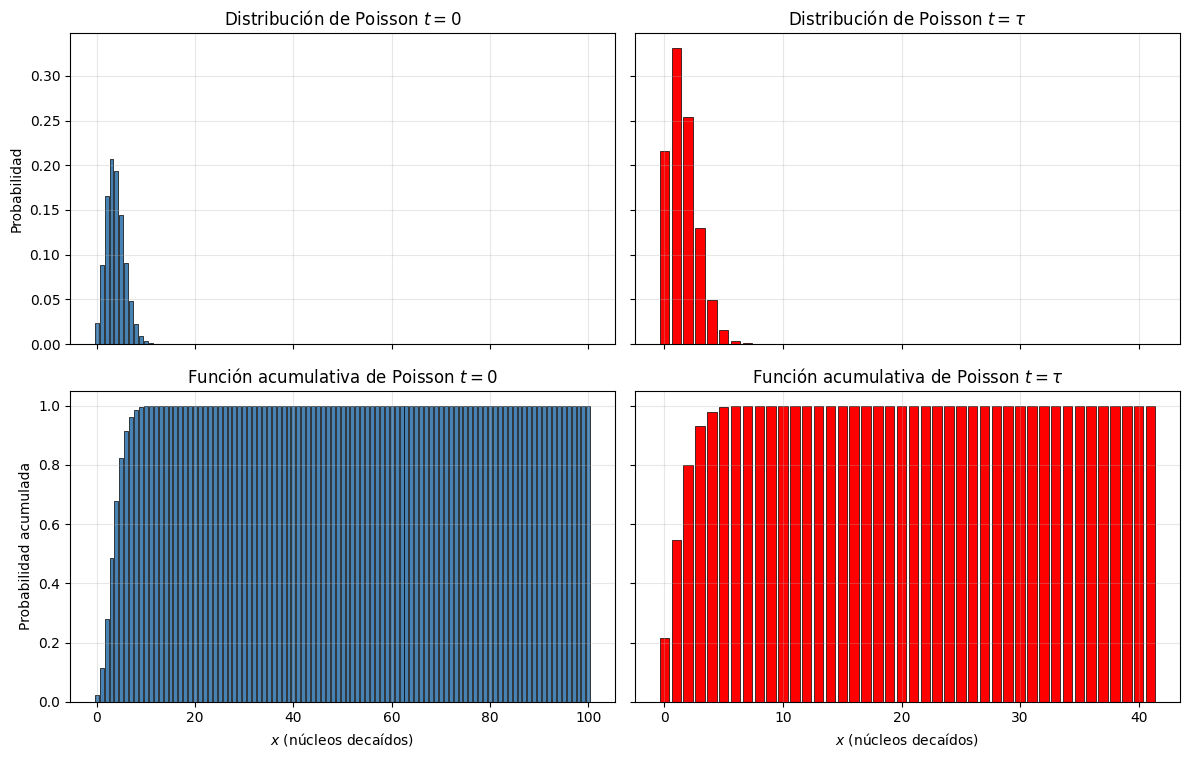

In [19]:
N0 = 100                                    # número de núcleos iniciales (del enunciado) N(0) = 100
T_med = 55.6                                # semi-vida del 220 Rn
tau = T_med / math.log(2)                   # vida media de 220 Rn
dt = 3                                      # paso de tiempo

t = 0                                       # tiempo inicial
N = N0                                      # número de núcleos restantes, inicializo con el número de núcleos iniciales
tiempos = [t]                               # para guardar los tiempos
N_t = [N]                                   # para guardar los núcleos restantes en cada t_i
A_t = []                                    # para guardar la actividad en cada t_i
mu_t = []                                   # para guardad el mu para cada tiempo de interés, en este caso un t inicial y un t intermedio
pmf_values = []                             # para guardar PMF (probability mass function)
cdf_values = []                             # para guardar CDF (cumulative density function)


while N > 0:                                # mientras queden núcleos por decaer

    p = dt / tau
    mu = N * p

    X = poisson.rvs(mu=mu)                  # genero un número aleatorio de desintegraciones con la distribución de Poisson

    A = X / dt                              # actividad en el intervalo (t_i, t_i + dt), (número de decaimientos)

    mu_t.append(mu)                         # guardo el valor instantáneo de mu en t_i, y los demás de abajo
    A_t.append(A)
    N_t.append(N)
    tiempos.append(t)


    sigma = np.sqrt(mu)                     # desviación estándar según la distribución de Poisson
    x = np.arange(0, N + 1)                 # defino un rango de x adecuado, teniendo en cuenta que las desintegraciones no pueden superar el número de núcleos
    pmf = poisson.pmf(x, mu)                # calculo pmf
    cdf = poisson.cdf(x, mu)                # calculo cdf
    pmf_values.append(pmf)                  # las guardo
    cdf_values.append(cdf)

    N -= X                                  # actualizo el número de núcleos "sobrevivientes"
    t += dt                                 # actualizo el tiempo

t_teo = np.array(tiempos)
N_teo = N0 * np.exp(-t_teo / tau)
A_teo = (N0 / tau) * np.exp(-t_teo / tau)


step_0 = 0                                             # tiempo inicial
step_med = np.argmin(np.abs(np.array(tiempos) - tau))  # índice cercano a tiempo tau (que usaremos como tiempo "intermedio")


fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex='col', sharey='row')

# PMF en t = 0
x0 = np.arange(len(pmf_values[step_0]))
axs[0, 0].bar(x0, pmf_values[step_0], color='steelblue', linewidth=0.5, edgecolor='black')
axs[0, 0].set_title(r'Distribución de Poisson $t=0$')
axs[0, 0].set_ylabel('Probabilidad')
axs[0, 0].grid(alpha=0.3)

# --- PMF en t ≈ t_medio ---
xt = np.arange(len(pmf_values[step_med]))
axs[0, 1].bar(xt, pmf_values[step_med], color='red',linewidth=0.5, edgecolor='black')
axs[0, 1].set_title(r'Distribución de Poisson $t=\tau$')
axs[0, 1].grid(alpha=0.3)

# --- CDF en t = 0 ---
axs[1, 0].bar(x0, cdf_values[step_0], color='steelblue',linewidth=0.5, edgecolor='black')
axs[1, 0].set_title(r'Función acumulativa de Poisson $t=0$')
axs[1, 0].set_xlabel(r'$x$ (núcleos decaídos)')
axs[1, 0].set_ylabel('Probabilidad acumulada')
axs[1, 0].grid(alpha=0.3)

# --- CDF en t ≈ t_medio ---
axs[1, 1].bar(xt, cdf_values[step_med], color='red',linewidth=0.5, edgecolor='black')
axs[1, 1].set_title(r'Función acumulativa de Poisson $t=\tau$')
axs[1, 1].set_xlabel(r'$x$ (núcleos decaídos)')
axs[1, 1].grid(alpha=0.3)

#plt.suptitle('Distribuciones de Poisson simuladas en distintos tiempos', fontsize=16)
plt.subplots_adjust(hspace=0.25, wspace=0.15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#T5
Graficar A(t_i) y comparar con A(0)exp(-t/tau)

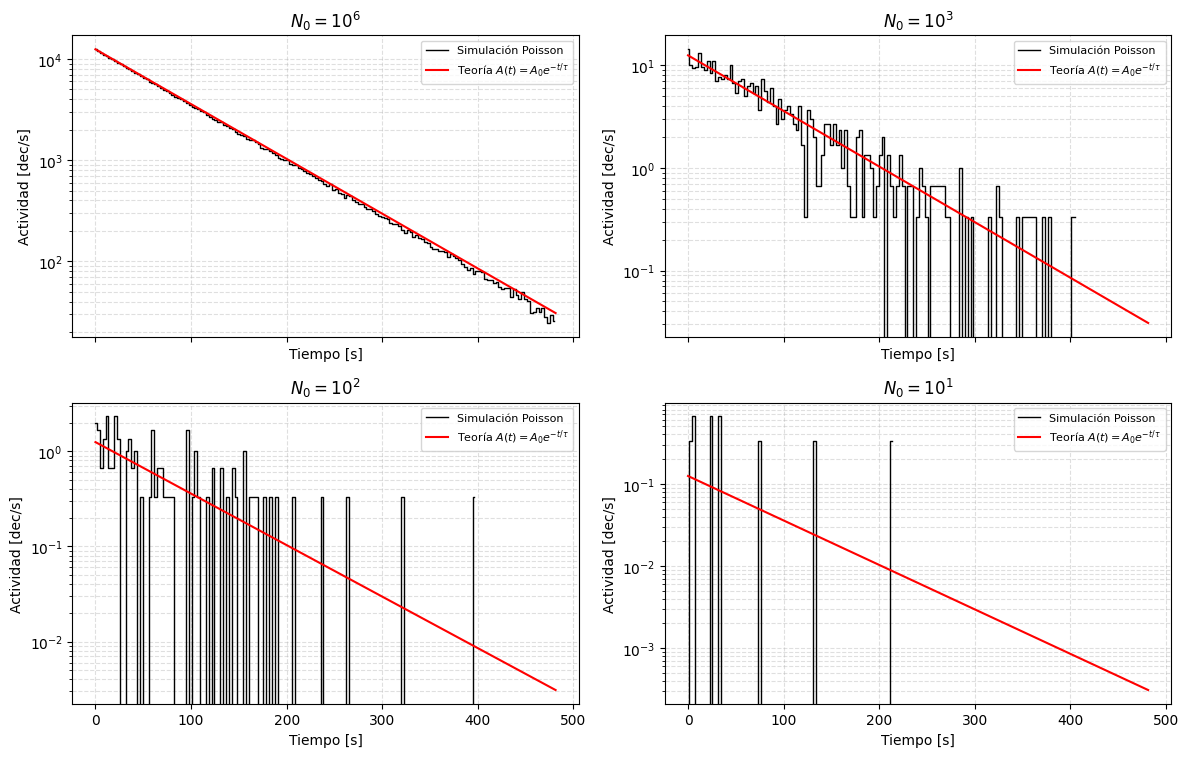

In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson

T_med = 55.6                           # semivida del 220Rn
tau = T_med / math.log(2)              # vida media
dt = 3                                 # paso de tiempo [s]


N0_list = [int(1e6), int(1e3), 100, 10]   # núcleos iniciales

t_max = 6 * tau                           # suficiente tiempo de simulación para que todos los núcleos decaigan
n_steps = int(np.ceil(t_max / dt))


def simul_poisson(N0, tau, dt, n_steps):
    p = dt/tau
    N = N0
    t = 0.0
    tiempos, A_vals = [], []

    for _ in range(n_steps):
        if N <= 0:
            break
        mu = N * p                     # media de Poisson
        X = poisson.rvs(mu=mu)         # núcleos decaídos en Δt
        A_vals.append(X / dt)          # actividad instantánea
        tiempos.append(t)
        N -= X                         # actualizo núcleos sobrevivientes
        t += dt

    return np.array(tiempos), np.array(A_vals)


def theo_activity(N0, tau, times):
    A0 = N0 / tau
    return A0 * np.exp(-times / tau)


for N0 in N0_list:
    t_pois, A_pois = simul_poisson(N0, tau, dt, n_steps)
    t_teo = np.linspace(0, t_max, 300)
    A_teo = theo_activity(N0, tau, t_teo)


fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=False)

for ax, N0 in zip(axs.flat, N0_list):
    t_pois, A_pois = simul_poisson(N0, tau, dt, n_steps)
    t_teo = np.linspace(0, t_max, 300)
    A_teo = theo_activity(N0, tau, t_teo)

    ax.semilogy(t_pois, A_pois, drawstyle='steps-mid', color='black', label='Simulación Poisson', lw=1)
    ax.semilogy(t_teo, A_teo, color='red', lw=1.5, label=r'Teoría $A(t)=A_0e^{-t/\tau}$')

    ax.set_title(fr"$N_0 = 10^{{{int(np.log10(N0))}}}$", fontsize=12)
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend(fontsize=8)
    ax.set_xlabel("Tiempo [s]")
    ax.set_ylabel("Actividad [dec/s]")

#plt.suptitle("Comparación entre simulación Poisson y teoría exponencial", fontsize=14, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#T6
Comparar los resultados de la simulación Poisson con los resultados usando la distribución exponencial

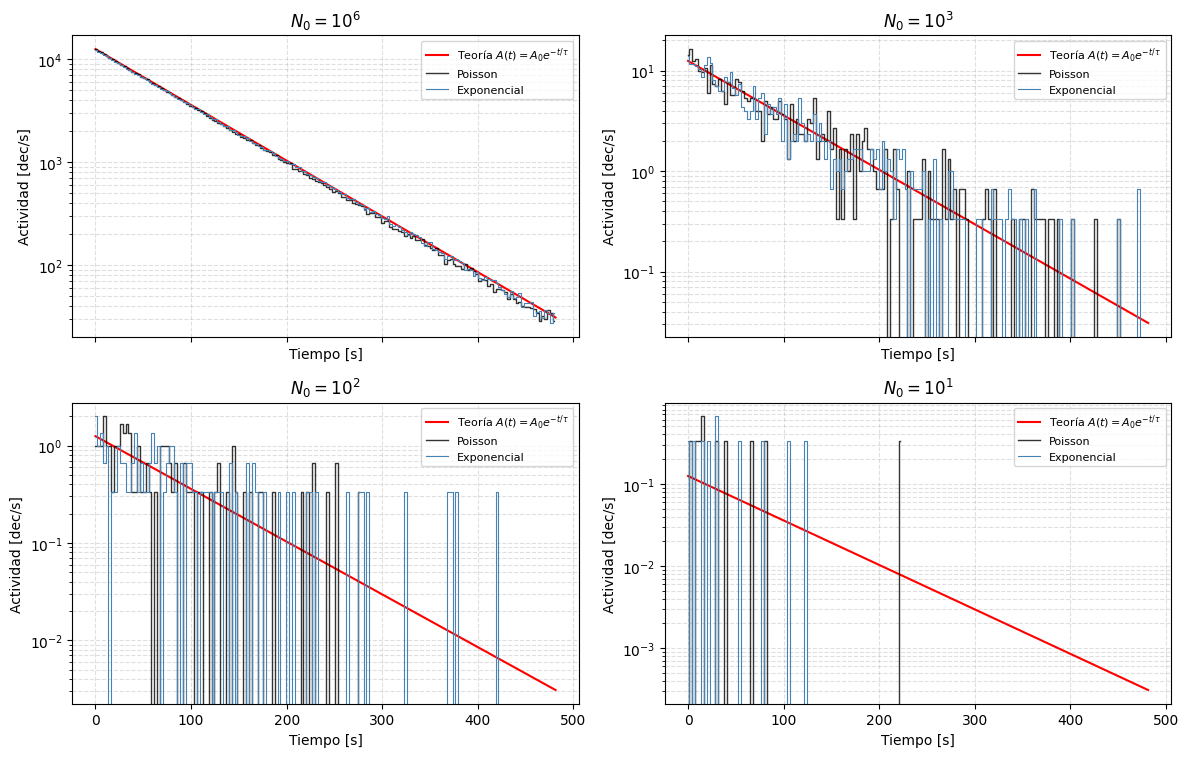

In [33]:
T_med = 55.6
tau = T_med / math.log(2)
dt = 3

N0_list = [int(1e6), int(1e3), 100, 10]

t_max = 6 * tau
n_steps = int(np.ceil(t_max / dt))

def simul_poisson(N0, tau, dt, n_steps):
    p = dt / tau
    N = N0
    t = 0.0
    tiempos, A_vals = [], []
    for _ in range(n_steps):
        if N <= 0:
            break
        mu = N * p
        X = poisson.rvs(mu=mu)
        A_vals.append(X / dt)
        tiempos.append(t)
        N -= X
        t += dt
    return np.array(tiempos), np.array(A_vals)

def simul_exponencial(N0, tau, dt, t_max):                    # simulación exponencial
    t_decay = np.random.exponential(scale=tau, size=N0)
    tiempos = np.arange(0, t_max + dt, dt)
    A_t = []
    for i in range(len(tiempos) - 1):
        t_ini, t_fin = tiempos[i], tiempos[i + 1]
        decaidos = np.sum((t_decay > t_ini) & (t_decay <= t_fin))
        A_t.append(decaidos / dt)
    return tiempos[:-1], np.array(A_t)


def theo_activity(N0, tau, times):
    A0 = N0 / tau
    return A0 * np.exp(-times / tau)

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=False)

for ax, N0 in zip(axs.flat, N0_list):
    t_pois, A_pois = simul_poisson(N0, tau, dt, n_steps)
    t_exp, A_exp = simul_exponencial(N0, tau, dt, t_max)
    t_teo = np.linspace(0, t_max, 300)
    A_teo = theo_activity(N0, tau, t_teo)


    ax.semilogy(t_teo, A_teo, 'r-', lw=1.5, label=r'Teoría $A(t)=A_0e^{-t/\tau}$')
    ax.semilogy(t_pois, A_pois, drawstyle='steps-mid', color='black', lw=1, alpha=0.8, label='Poisson')
    ax.semilogy(t_exp, A_exp, drawstyle='steps-mid', color='steelblue', lw=0.8, label='Exponencial')


    ax.set_title(fr"$N_0 = 10^{{{int(np.log10(N0))}}}$", fontsize=12)
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend(fontsize=8)
    ax.set_xlabel("Tiempo [s]")
    ax.set_ylabel("Actividad [dec/s]")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#T7
Comparar los resultados de la simulación Poisson con los resultados usando la distribución binomial

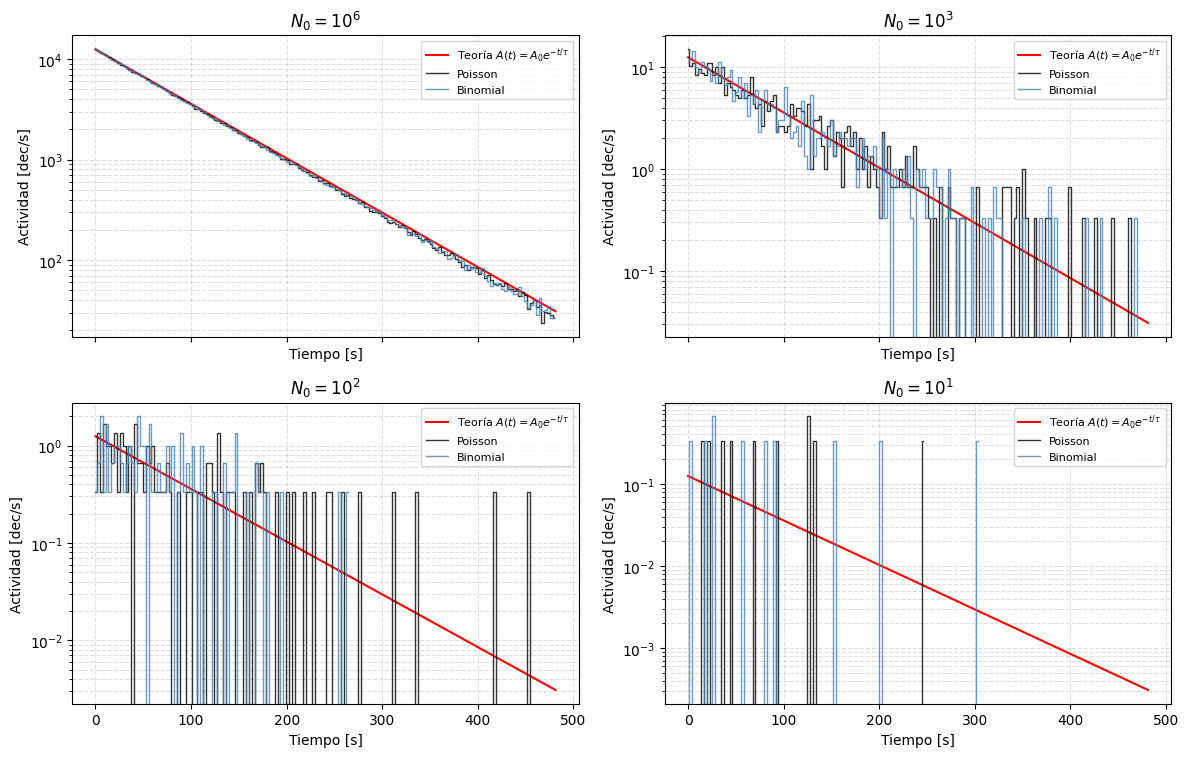

In [39]:
from scipy.stats import poisson, binom

T_med = 55.6
tau = T_med / math.log(2)
dt = 3

N0_list = [int(1e6), int(1e3), 100, 10]
t_max = 6 * tau
n_steps = int(np.ceil(t_max / dt))

def simul_poisson(N0, tau, dt, n_steps):
    p = dt/tau
    N = N0
    t = 0.0
    tiempos, A_vals = [], []
    for _ in range(n_steps):
        if N <= 0:
            break
        mu = N * p
        X = poisson.rvs(mu=mu)
        A_vals.append(X / dt)
        tiempos.append(t)
        N -= X
        t += dt
    return np.array(tiempos), np.array(A_vals)

def simul_binomial(N0, tau, dt, n_steps):
    p = dt/tau
    N = N0
    t = 0.0
    tiempos, A_vals = [], []
    for _ in range(n_steps):
        if N <= 0:
            break
        X = binom.rvs(n=N, p=p)
        A_vals.append(X / dt)
        tiempos.append(t)
        N -= X
        t += dt
    return np.array(tiempos), np.array(A_vals)

def theo_activity(N0, tau, times):
    A0 = N0 / tau
    return A0 * np.exp(-times / tau)

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=False)

for ax, N0 in zip(axs.flat, N0_list):
    t_pois, A_pois = simul_poisson(N0, tau, dt, n_steps)
    t_bin, A_bin = simul_binomial(N0, tau, dt, n_steps)
    t_teo = np.linspace(0, t_max, 300)
    A_teo = theo_activity(N0, tau, t_teo)

    ax.semilogy(t_teo, A_teo, 'r-', lw=1.5, label=r'Teoría $A(t)=A_0 e^{-t/\tau}$')
    ax.semilogy(t_pois, A_pois, drawstyle='steps-mid', color='black', lw=1, alpha=0.8, label='Poisson')
    ax.semilogy(t_bin, A_bin, drawstyle='steps-mid', color='steelblue', lw=1, alpha=0.8, label='Binomial')

    ax.set_title(fr"$N_0 = 10^{{{int(np.log10(N0))}}}$", fontsize=12)
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend(fontsize=8)
    ax.set_xlabel("Tiempo [s]")
    ax.set_ylabel("Actividad [dec/s]")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#T5
Graficar A(t_i) y comparar con A(0)exp(-t/tau)
#T6
Comparar los resultados de la simulación Poisson con los resultados usando la distribución exponencial
#T7
Comparar los resultados de la simulación Poisson con los resultados usando la distribución binomial

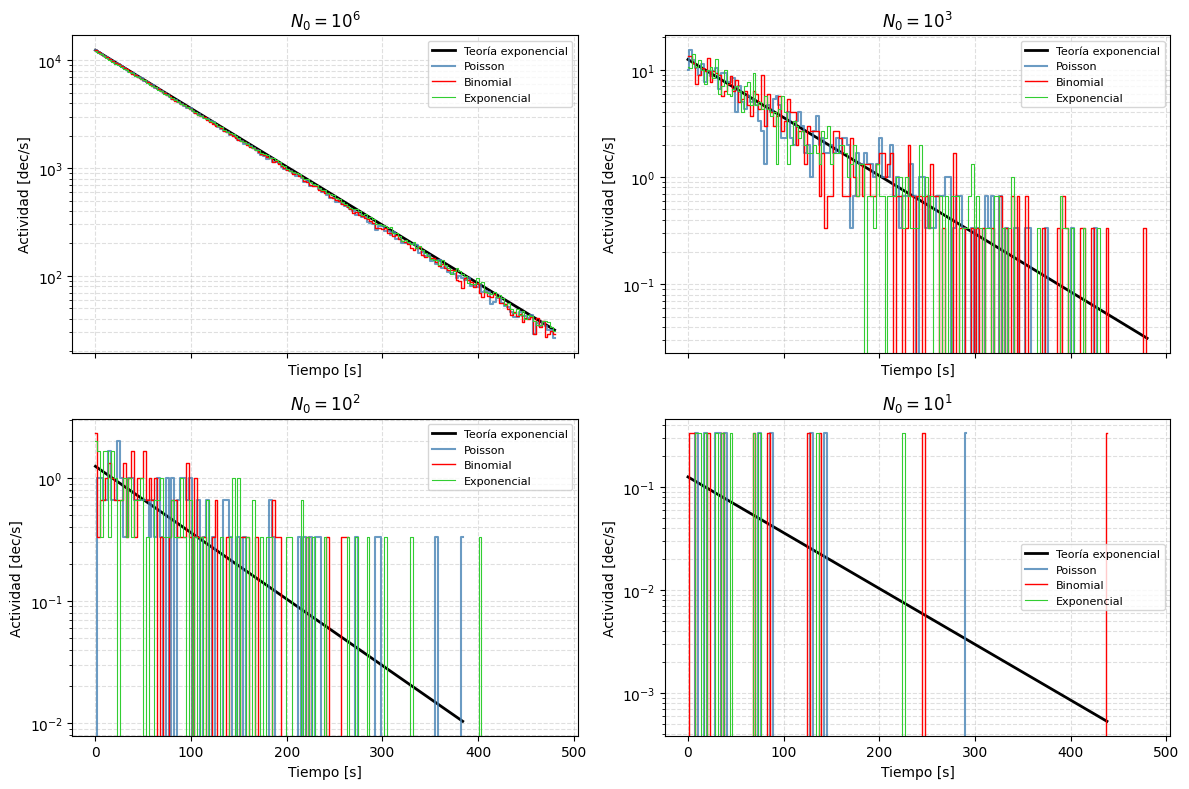

In [44]:
from scipy.stats import poisson, binom
import numpy as np
import math
import matplotlib.pyplot as plt

T_med = 55.6
tau = T_med / math.log(2)
dt = 3

N0_list = [int(1e6), int(1e3), 100, 10]                             # distintos valores de N0 que propone el enunciado

t_max = 6 * tau                                                     # debemos dejar simular suficiente tiempo para que la actividad (teórica) se haya reducido lo suficiente, y para que las curvas de los distintos casos sean comparables
n_steps = int(np.ceil(t_max / dt))


def simul_poisson(N0, tau, dt, n_steps):                            # simulación de Poisson
    p = dt/tau
    N = N0
    t = 0.0
    tiempos = []
    A_vals = []
    N_vals = []
    for i in range(n_steps):
        if N <= 0:                                                  # si ya no quedan núcleos por decaer
            break                                                   # detengo la simulación
        mu = N * p
        X_pois = poisson.rvs(mu=mu)                                 # número de desintegraciones en el paso (Poisson)
        X_binom = binom.rvs(n=N, p=p)                               # número de desintegraciones en el paso (Binomial)
        A_vals.append(X_pois / dt)                                  # guardo la actividad en el tiempo transcurrido
        tiempos.append(t)
        N_vals.append(N)
        N -= X_pois                                                 # actualizo los núcleos sobrevivientes y el tiempo
        t += dt

    return np.array(tiempos), np.array(A_vals), np.array(N_vals)


def simul_binomial(N0, tau, dt, n_steps):                           # simulación binomial (idéntica que Poisson pero usando binomial para X)
    p = dt/tau
    N = N0
    t = 0.0
    tiempos = []
    A_vals = []
    N_vals = []
    for i in range(n_steps):
        if N <= 0:
            break
        X_binom = binom.rvs(n=N, p=p)
        A_vals.append(X_binom / dt)
        tiempos.append(t)
        N_vals.append(N)
        N -= X_binom
        t += dt
    return np.array(tiempos), np.array(A_vals), np.array(N_vals)


def simul_exponencial(N0, tau, dt, t_max):                          # simulación exponencial
    tiempos = np.arange(0, t_max + dt, dt)
    t_decay = np.random.exponential(scale=tau, size=N0)             # tiempos de vida de cada núcleo

    A_t = []
    for i in range(len(tiempos) - 1):
        t_ini = tiempos[i]
        t_fin = tiempos[i + 1]
        decaimientos = np.sum((t_decay > t_ini) & (t_decay <= t_fin))
        A_t.append(decaimientos / dt)

    return tiempos[:-1], np.array(A_t)


def theo_activity(N0, tau, times):                           # función de la actividad teórica
    return (N0 / tau) * np.exp(-times / tau)


fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=False)

for ax, N0 in zip(axs.flat, N0_list):
    # Simulación Poisson
    t_pois, A_pois, _ = simul_poisson(N0, tau, dt, n_steps)
    # Simulación Binomial
    t_bin, A_bin, _ = simul_binomial(N0, tau, dt, n_steps)
    # Simulación Exponencial
    t_exp, A_exp = simul_exponencial(N0, tau, dt, t_max)
    # Curva teórica
    t_teo = np.linspace(0, np.maximum(t_pois[-1], t_bin[-1]), 300)
    A_teo = theo_activity(N0, tau, t_teo)

    # Curva teórica
    ax.semilogy(t_teo, A_teo, 'k', lw=2, label='Teoría exponencial')

    # Simulación Poisson
    ax.semilogy(t_pois, A_pois, drawstyle='steps-mid', color='steelblue',
                 alpha=0.8, label=fr"Poisson")

    # Simulación Binomial
    ax.semilogy(t_bin, A_bin, drawstyle='steps-mid', color='red',
                 lw=1, label=fr"Binomial")

    # Simulación Exponencial
    ax.semilogy(t_exp, A_exp, drawstyle='steps-mid', lw=0.8,color='limegreen', label='Exponencial')

    ax.set_xlabel('Tiempo [s]')
    ax.set_ylabel('Actividad [dec/s]')
    ax.set_title(f'$N_0=10^{{{int(np.log10(N0))}}}$')
    ax.legend(fontsize=8)
    ax.grid(True, which='both', ls='--', alpha=0.4)

plt.tight_layout()
plt.show()
